<a href="https://colab.research.google.com/github/cicerojr10/projeto-metricas-avaliacao/blob/main/M%C3%A9tricas_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow matplotlib seaborn pandas --quiet

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Definindo as classes (0 a 9)
classes = list(range(10))

# Número de amostras
n_amostras = 200

# Labels reais (verdadeiros)
y_true = [random.choice(classes) for _ in range(n_amostras)]

# Previsões com 80% de chance de acerto e 20% de erro
y_pred = [val if random.random() > 0.2 else random.choice(classes) for val in y_true]

In [4]:
# Matriz de confusão com 10 classes
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred, num_classes=10).numpy()

# Normalização por linha
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1, keepdims=True), decimals=2)

# Converter para DataFrame
con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

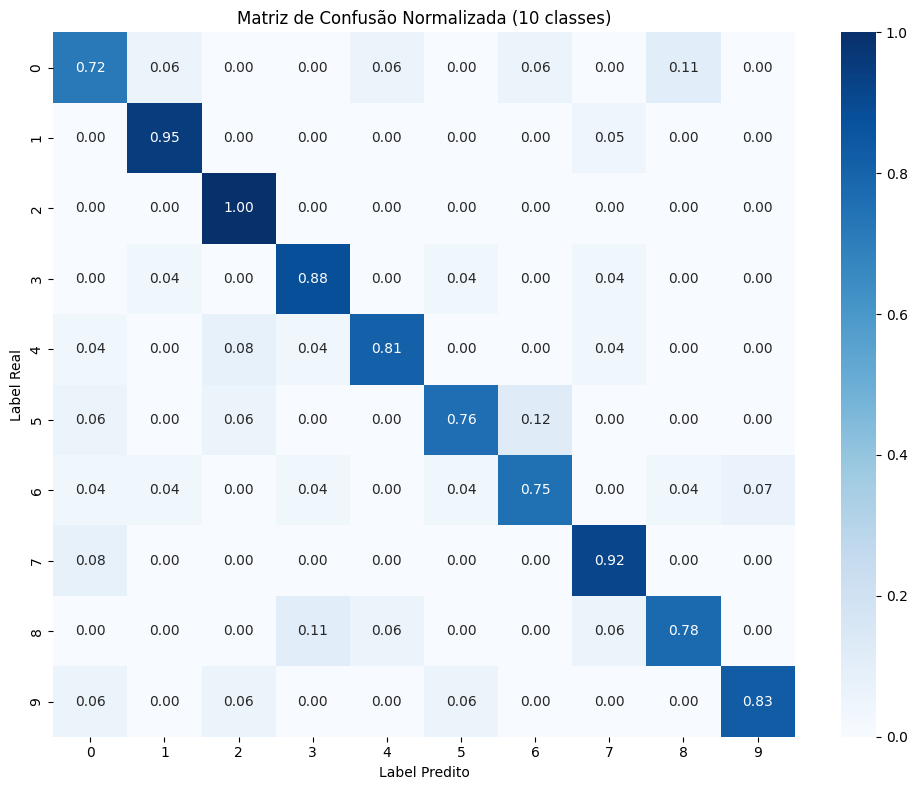

In [9]:
from google.colab import files

# Salvar imagem localmente
plt.figure(figsize=(10, 8))
sns.heatmap(con_mat_df, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel("Label Predito")
plt.ylabel("Label Real")
plt.title("Matriz de Confusão Normalizada (10 classes)")
plt.tight_layout()

# Nome do arquivo
nome_arquivo = "matriz_confusao.png"
plt.savefig(nome_arquivo)

# Baixar o arquivo para seu computador
files.download(nome_arquivo)